출처: https://www.kaggle.com/c/titanic

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5) # 이 두줄은 본 필자가 항상 쓰는 방법입니다. matplotlib 의 기본 scheme 말고 seaborn scheme 을 세팅하고, 일일이 graph 의 font size 를 지정할 필요 없이 seaborn 의 font_scale 을 사용하면 편합니다.

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [10]:
train = pd.read_csv("data/titanic/train.csv")
test = pd.read_csv("data/titanic/test.csv")

In [11]:
print(f"train의 shape :{train.shape}")
print(f"test의 shape :{test.shape}")

train의 shape :(891, 12)
test의 shape :(418, 11)


In [12]:
# 예측하려는것 'Survived'
set(train) - set(test)

{'Survived'}

In [13]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [15]:
# 결측치 확인
for col in train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (train[col].isnull().sum() / train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [16]:
for col in test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (test[col].isnull().sum() / test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


####  trian, test set 에서 age, cabin 둘다 각 20%, 80%의 결측치 존재 확인
#### Embarked는 train에서만 0.22%

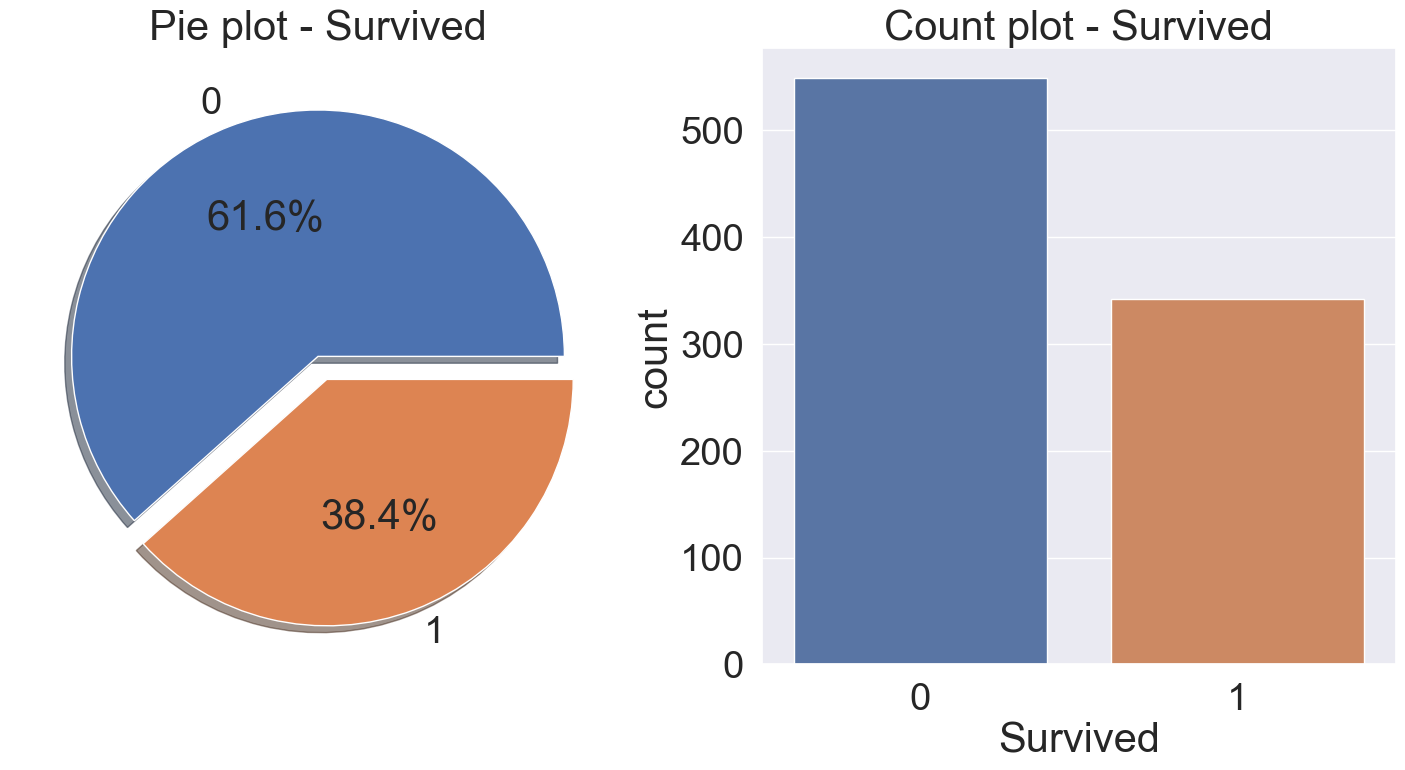

In [19]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot(data= train, x = 'Survived' ,ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

#### 38.4%가 살아남음

# EDA 

데이터는 많고 이 많은 데이터 안에서 숨겨진 사실을 찾기 위해선 시각화가 필요

# 1) Pclass 시각화

In [21]:
train[["Pclass", "Survived"]].groupby(["Pclass"]).count()

,Survived
Pclass,
1,216
2,184
3,491


In [22]:
train[["Pclass", "Survived"]].groupby(["Pclass"]).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [31]:
#  margins = True 하면 가로 세로 합계가 나옴
pd.crosstab(train["Pclass"], train["Survived"], margins = True).style.background_gradient(cmap='summer_r') # 시각화 효과넣기

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<AxesSubplot:xlabel='Pclass'>

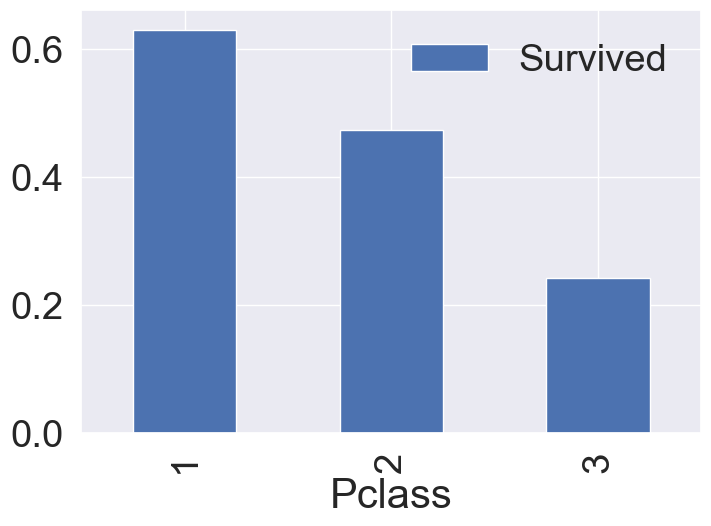

In [38]:
train[['Pclass', 'Survived']].groupby(["Pclass"]).mean().sort_values(by = "Survived", ascending=False).plot.bar()

### Pclass가 좋을수록(1에 근접) 생존률이 높다.

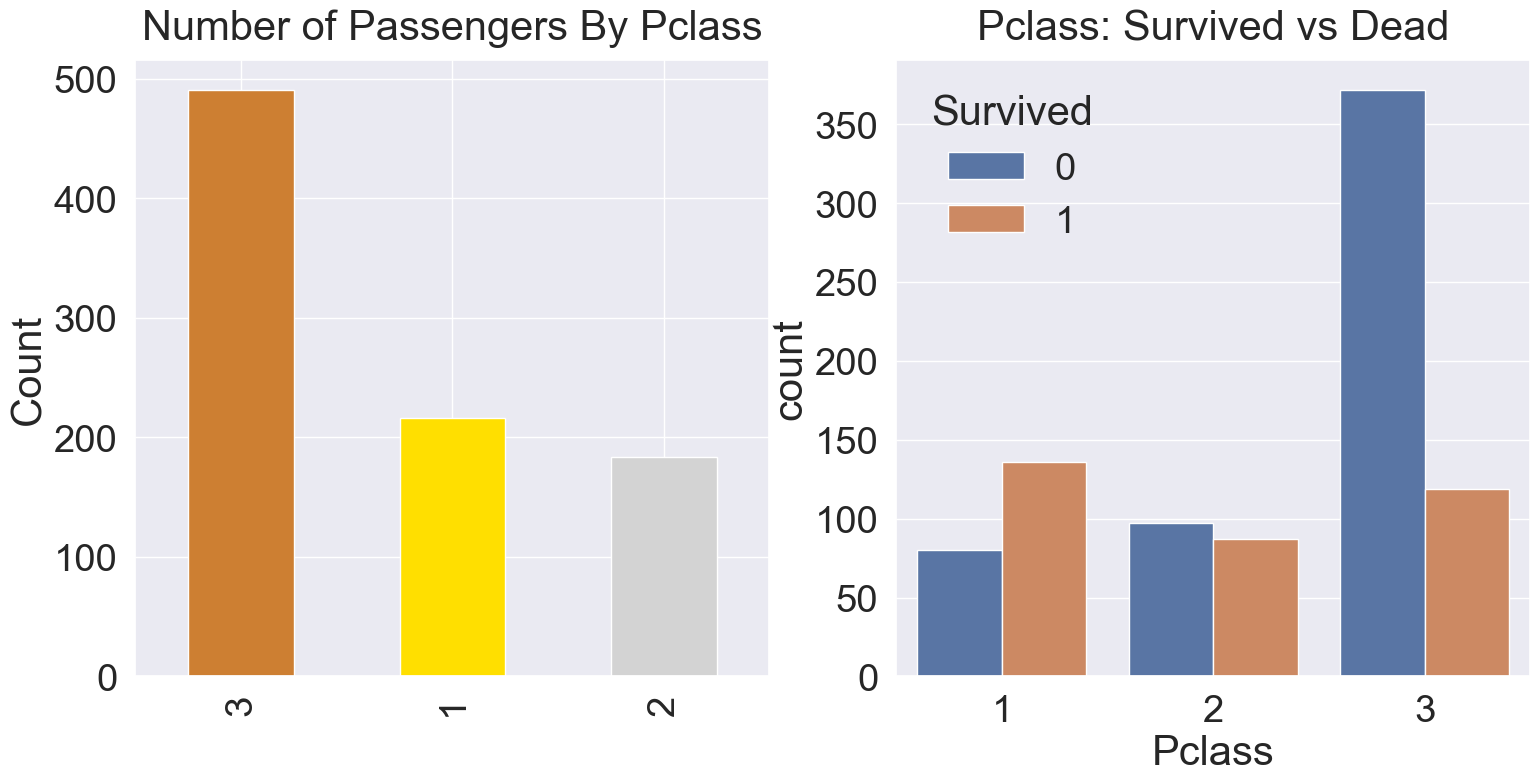

In [43]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))
train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot(x = 'Pclass', hue='Survived', data=train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

클래스가 높을 수록, 생존 확률이 높은걸 확인할 수 있습니다. Pclass 1, 2, 3 순서대로 63%, 48%, 25% 입니다

우리는 **생존에 Pclass 가 큰 영향**을 미친다고 생각해볼 수 있으며, 나중에 모델을 세울 때 이 feature 를 사용하는 것이 좋을 것이라 판단가능

# 2) Sex에 따른 시각화

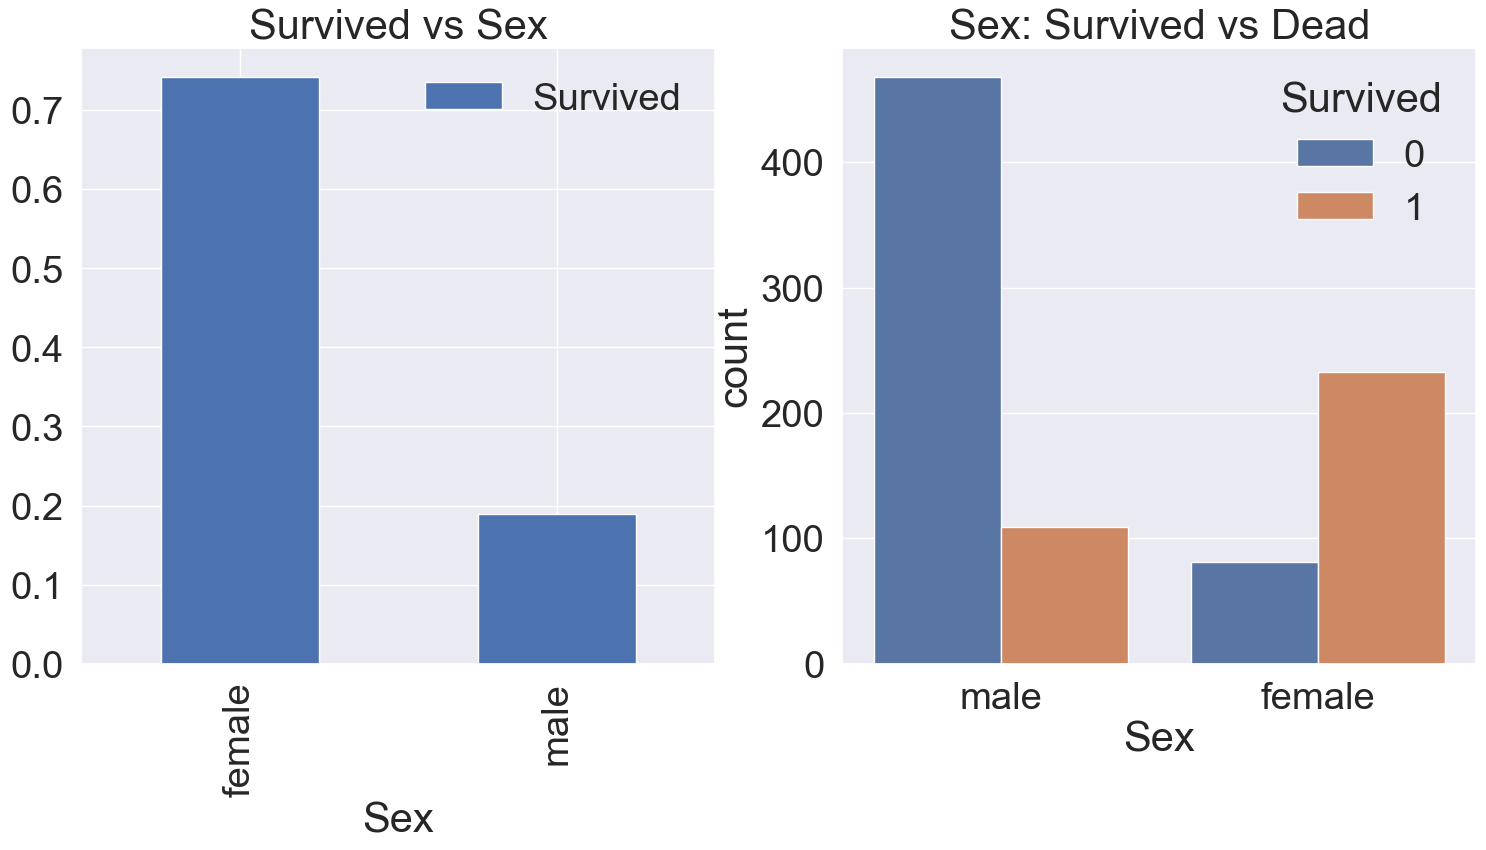

In [45]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x = 'Sex', hue='Survived', data=train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

### 여자의 생존확률이 더 높은것을 알 수 있다.

In [48]:
train[['Sex','Survived']].groupby(["Sex"]).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [50]:
train.groupby(["Sex"])[['Sex','Survived']].mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [53]:
pd.crosstab(train["Sex"], train["Survived"], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


# 3) Both Sex and Pclass

#### Sex, Pcalss 두가지에 관하여 생존차이 확인

seaborn 의 factorplot 을 이용하면, 손쉽게 3개의 차원으로 이루어진 그래프를 그릴 수 있습니다

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

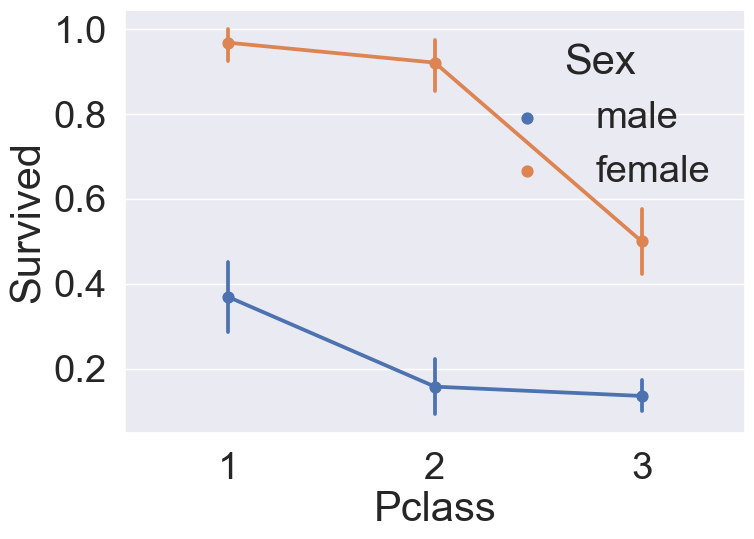

In [72]:
sns.pointplot(x = 'Pclass', y = 'Survived', hue = "Sex", data = train )


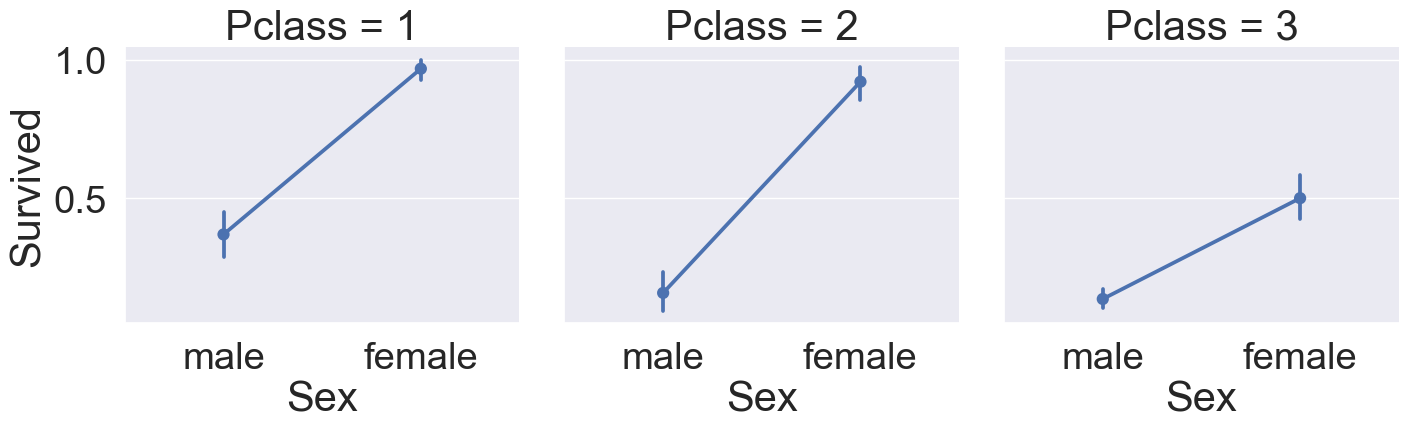

In [81]:
sns.catplot(x='Sex', y='Survived', col='Pclass',
              data= train, kind="point")

# 4) Age

In [82]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


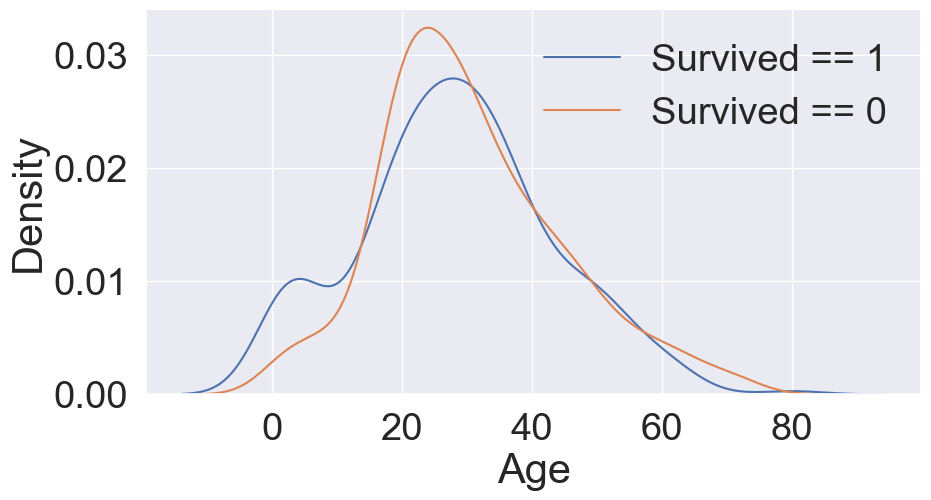

In [89]:
fig, ax = plt.subplots(1,1, figsize = (10,5))
sns.kdeplot(train[train["Survived"] == 1]["Age"], ax = ax)
sns.kdeplot(train[train["Survived"] == 0]["Age"], ax = ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

#### 생존자 의 경우 나이가 어린 경우가 많다.

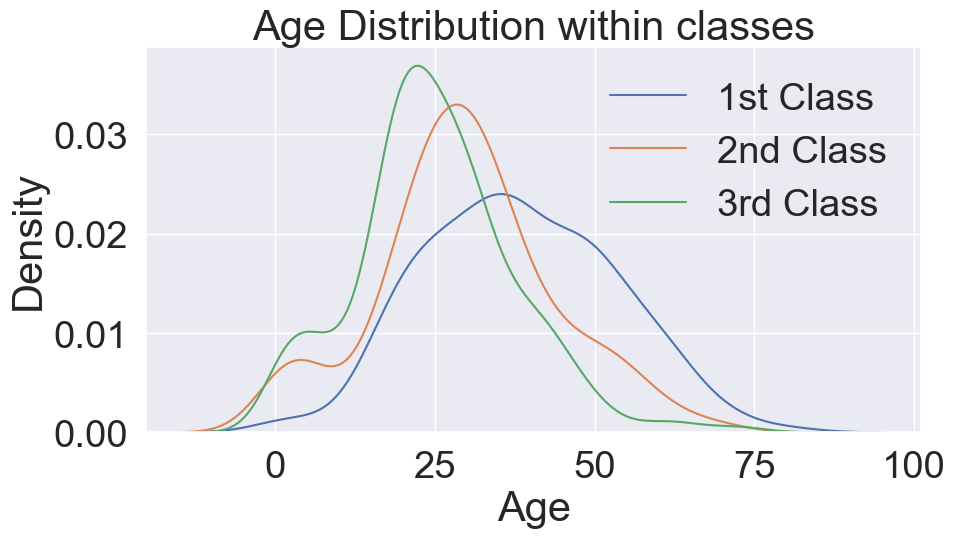

In [92]:
# Class 별 나이분포
fig, ax = plt.subplots(1,1, figsize = (10,5))
sns.kdeplot(train[train["Pclass"] == 1]["Age"], ax = ax)
sns.kdeplot(train[train["Pclass"] == 2]["Age"], ax = ax)
sns.kdeplot(train[train["Pclass"] == 3]["Age"], ax = ax)
plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

Class 가 높을수록 나이가 많은 사람의 비중이 커지는 것을 확인할 수 있다.

# 5) Pclass, Sex, Age

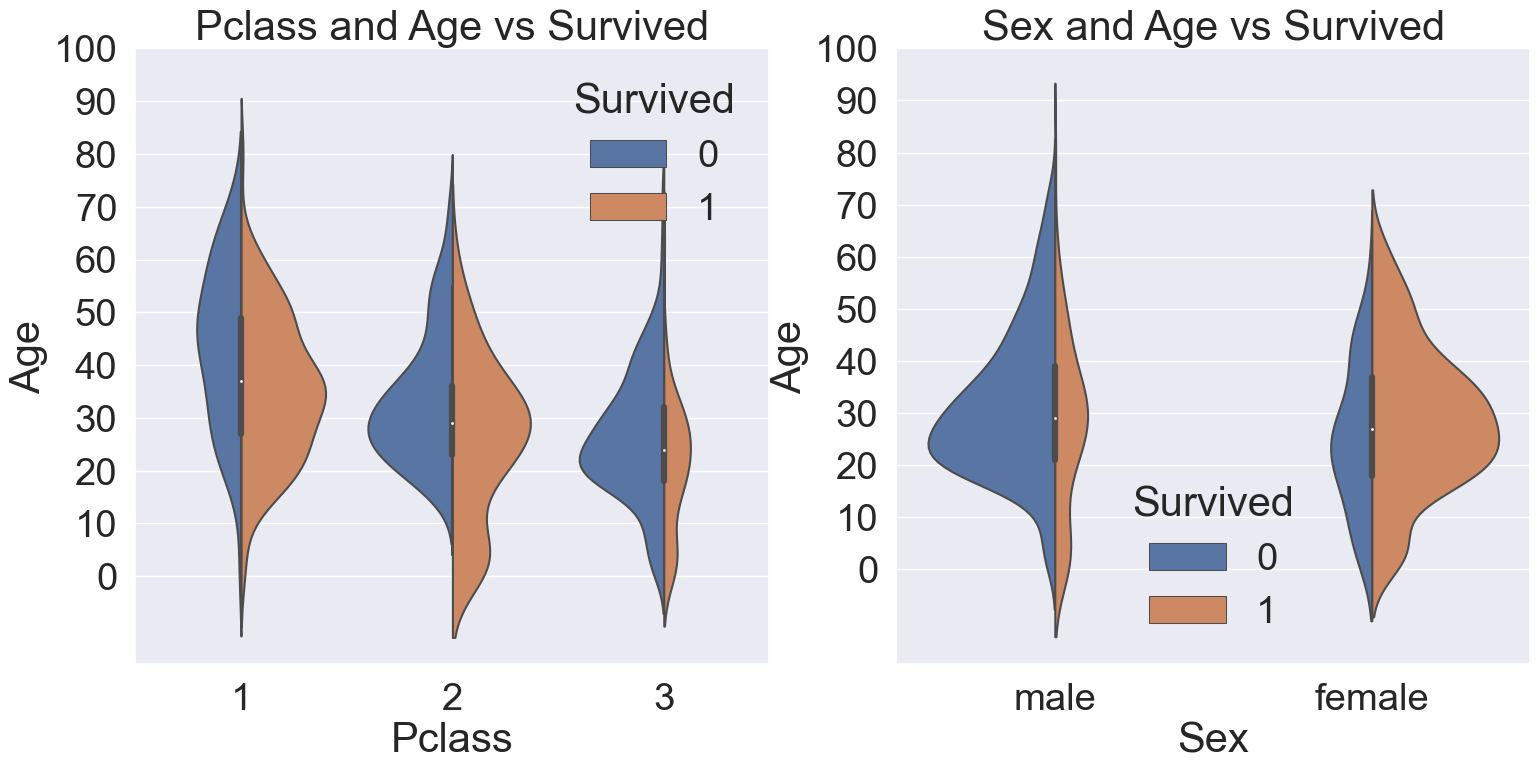

In [94]:
# 지금까지 본, Sex, Pclass, Age, Survived 모두에 대해서 보고싶다.
# 이를 쉽게 그려주는 것이 seaborn 의 violinplot

f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x = "Pclass",y = "Age", hue="Survived", data=train, scale='count', split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x = "Sex",y = "Age", hue="Survived", data=train, scale='count', split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

* violinplot을 보면 Pclass중 클래스가 낮을수록 생존을 많이 하였으며 
* 여자가 생존을 많이 한것으로 보입니다.
* 나이가 어릴수록 생존을 많이 한것도 보임
* 여성과 아이를 먼저 챙긴것으로 예상할 수 있다.
* 1,2 class는 출구와 가까웠는지 예상가능


# 6) Embarked

#### Embarked는 탑승한 항구를 나타낸다.

<AxesSubplot:xlabel='Embarked'>

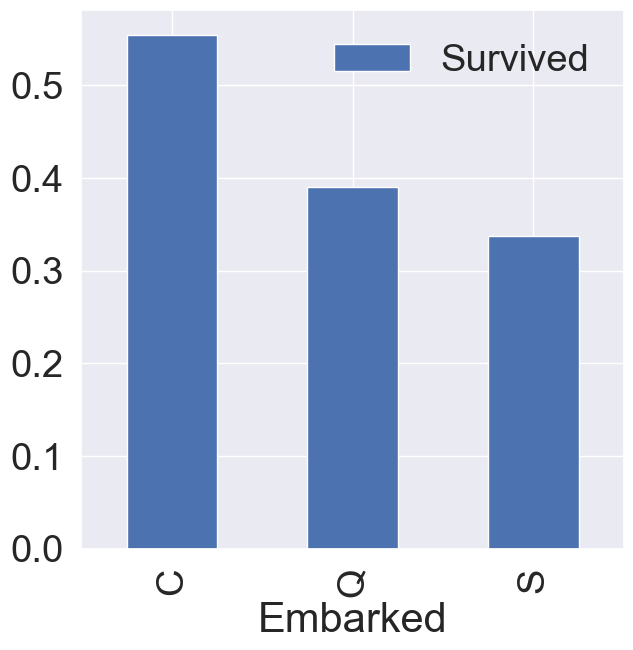

In [95]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

#### 생존률은 비슷하지만 C가 제일 높다.

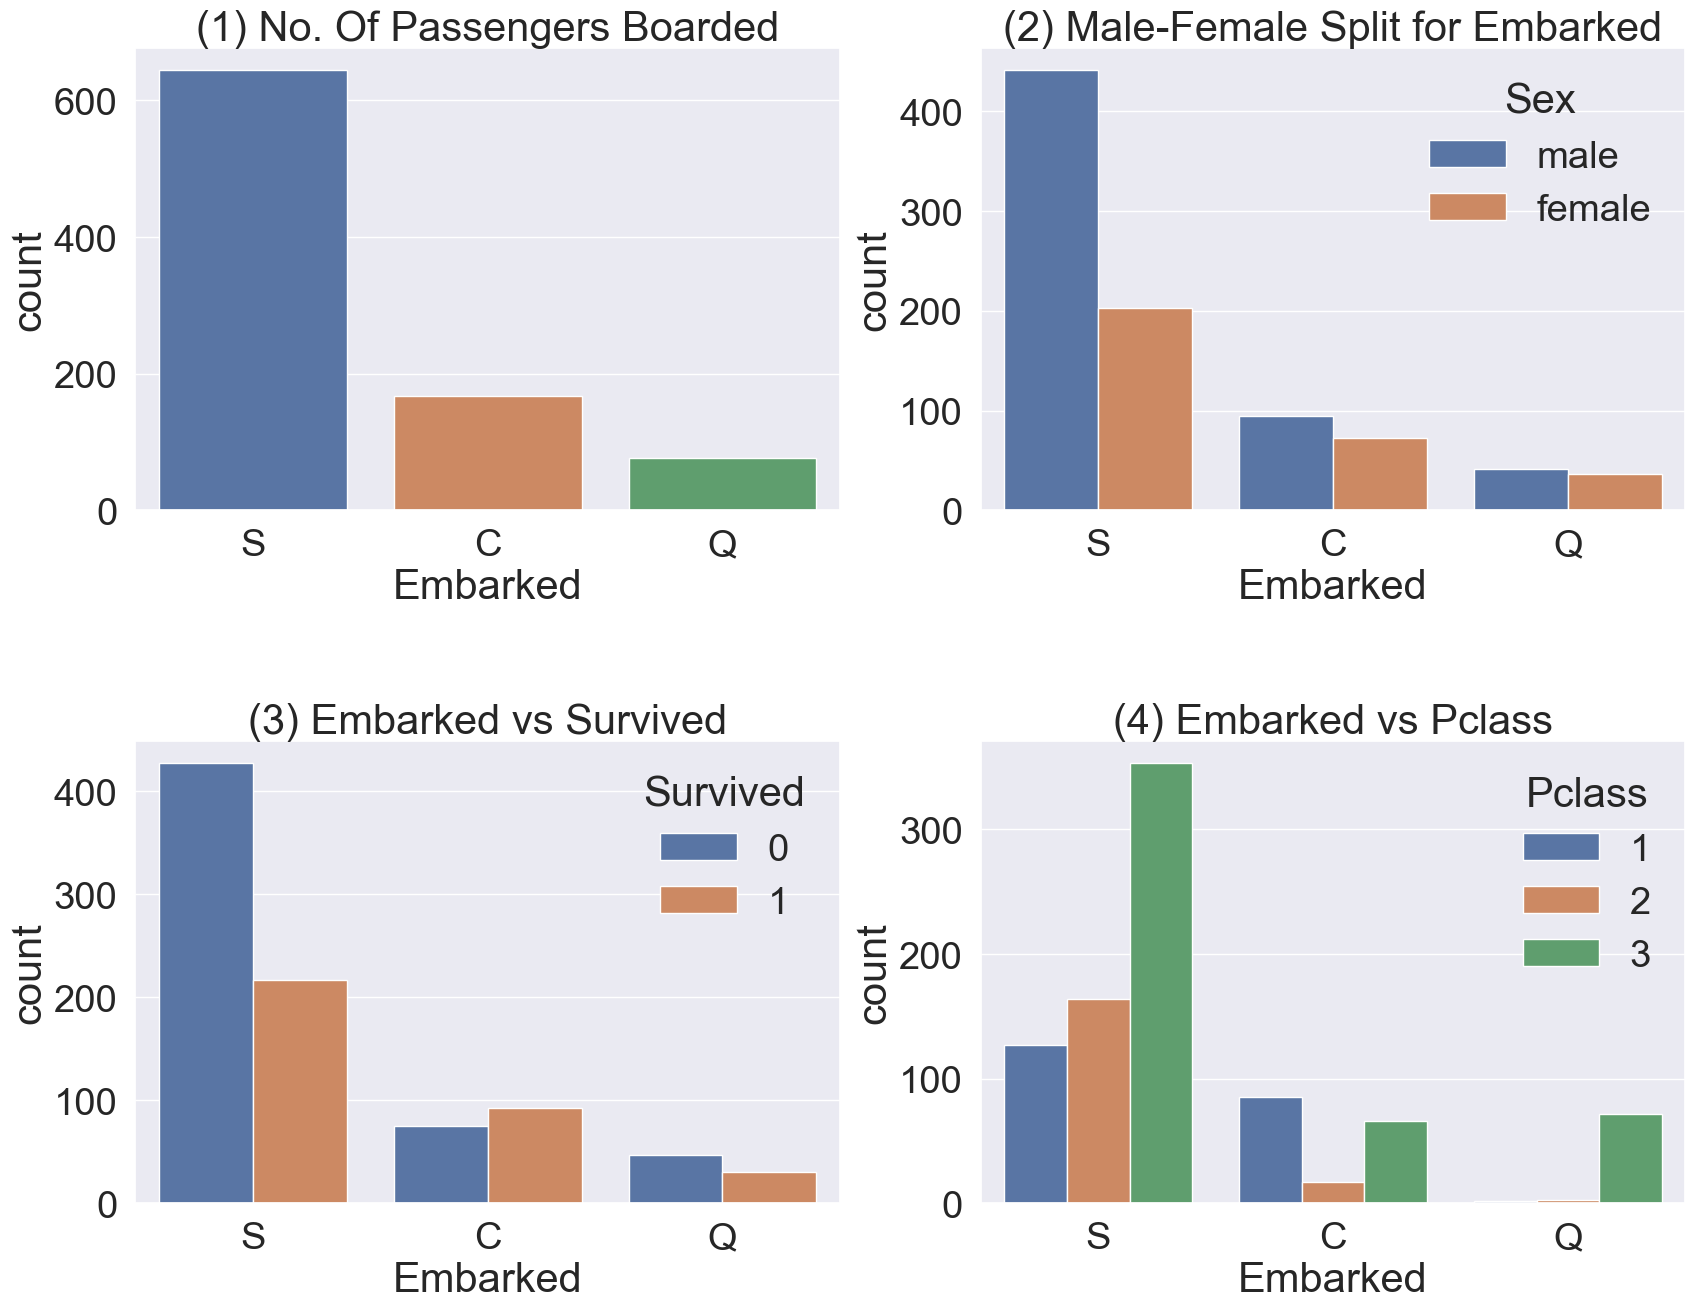

In [97]:
f,ax=plt.subplots(2, 2, figsize=(20,15))
sns.countplot(x = 'Embarked', data=train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')
sns.countplot(x = 'Embarked', hue='Sex', data=train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot(x = 'Embarked', hue='Survived', data=train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot(x = 'Embarked', hue='Pclass', data=train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

* Figure(1) - 전체적으로 봤을 때, S 에서 가장 많은 사람이 탑승했
* Figure(2) - C와 Q 는 남녀의 비율이 비슷하고, S는 남자가 더 많다.
* Figure(3) - 생존확률이 S 경우 많이 낮은 걸 볼 수 있다. (이전 그래프에서 봤었다)
* Figure(4) - Class 로 split 해서 보니, C가 생존확률이 높은건 클래스가 높은 사람이 많이 타서 그렇다. S는 3rd class 가 많아서 생존확률이 낮게 나온다.

# 7) Family - SibSp(형제 자매) + Parch(부모, 자녀)

In [104]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1 # 자기자신 포함하니 +1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

In [105]:
print("Maximum size of Family: ", train['FamilySize'].max())
print("Minimum size of Family: ", train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


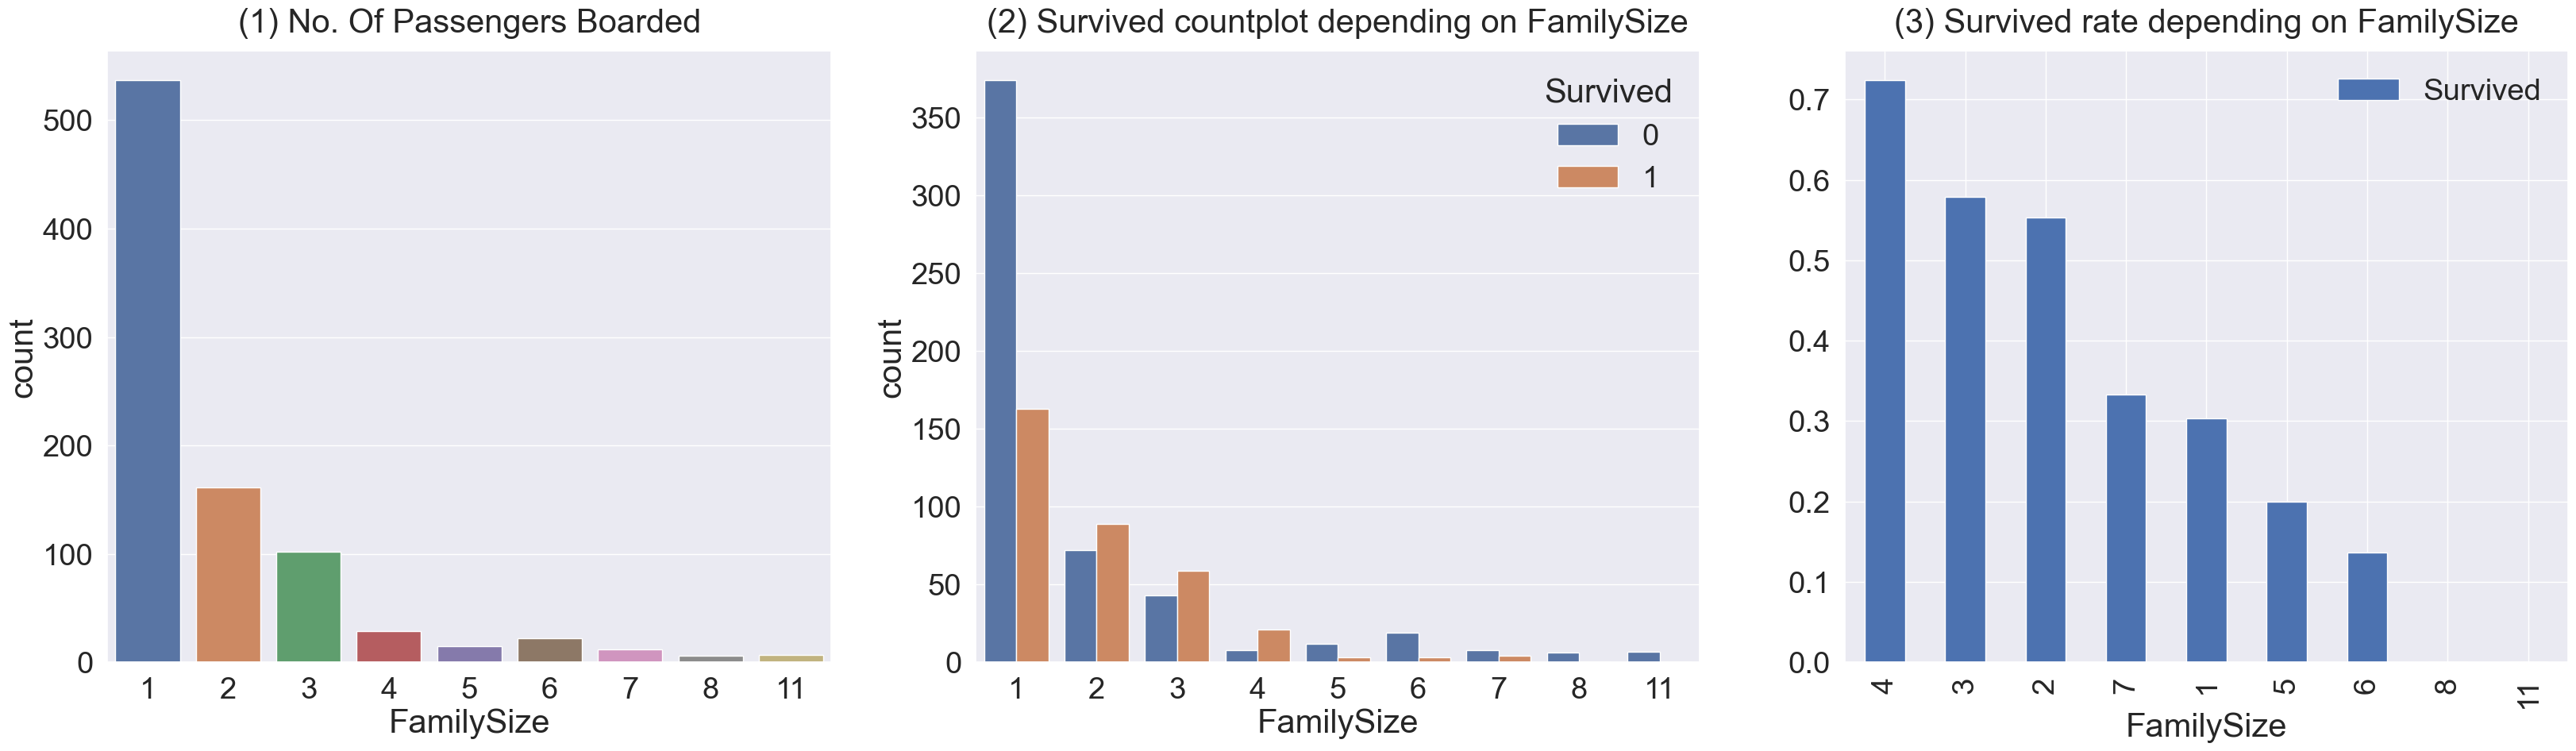

In [106]:
# FamilySize와의 생존 관계
f,ax=plt.subplots(1, 3, figsize=(40,10))
sns.countplot(x = 'FamilySize', data=train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot(x = 'FamilySize', hue='Survived', data=train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)

train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

* Figure (1) - 가족크기가 1~11까지 있음을 볼 수 있다. 대부분 1명이고 그 다음으로 2, 3, 4명이다.

* Figure (2), (3) - 가족 크기에 따른 생존비교이다. 가족이 4명인 경우가 가장 생존확률이 높다. 가족수가 많아질수록, (5, 6, 7, 8, 11) 생존확률이 낮아진요. 가족수가 너무 작아도(1), 너무 커도(5, 6, 8, 11) 생존 확률이 작다. 3~4명 선에서 생존확률이 높은 걸 확인할 수 있다.

# 8) Fare

In [109]:
# Fare는 탑승요금

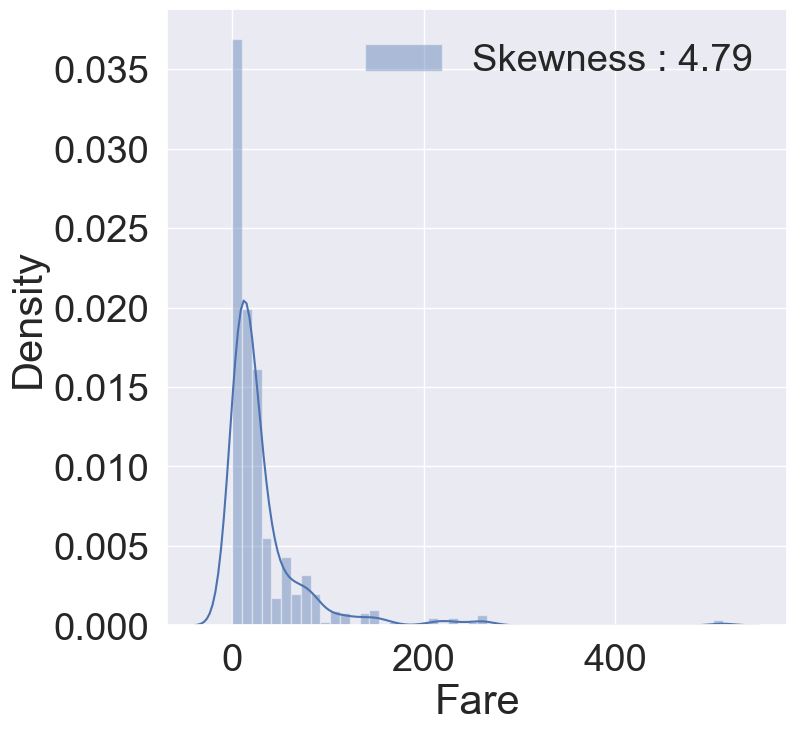

In [108]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(train['Fare'], color='b', label='Skewness : {:.2f}'.format(train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

* distribution이 매우 비대칭, 만약 이대로 모델에 넣어준다면 모델이 잘못 학습할 수도 있음
* Fare에 log를 취하면 정규분포 모양으로 살짝 바뀜

In [111]:
test.loc[test.Fare.isnull(), 'Fare'] = test['Fare'].mean() # testset 에 있는 nan value 를 평균값으로 치환합니다.

train['Fare'] = train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
test['Fare'] = test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

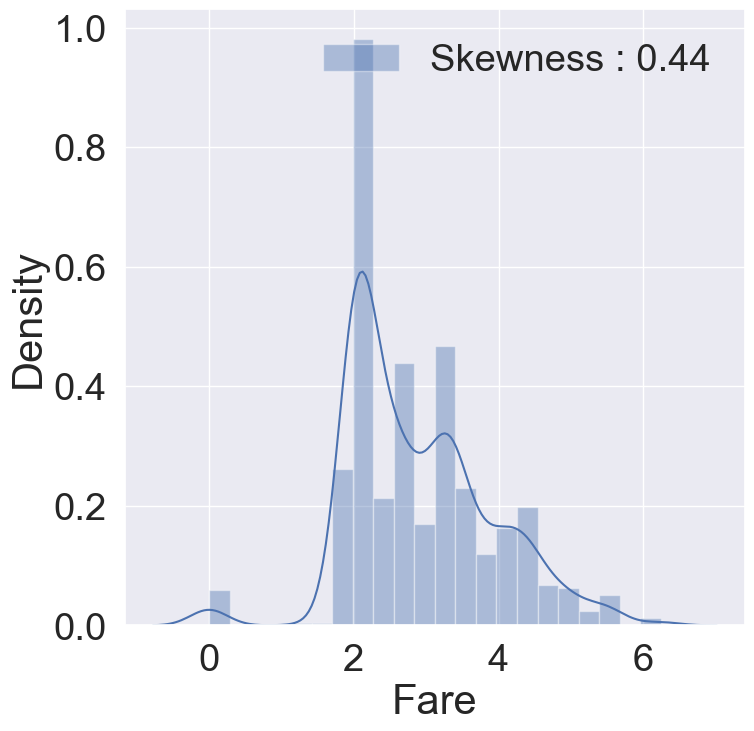

In [113]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(train['Fare'], color='b', label='Skewness : {:.2f}'.format(train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

# 9) Cabin

결측치가 대략 80%임. 이런변수는 제거해주는게 좋을듯함

In [116]:
train["Cabin"].isnull().mean()

0.7710437710437711